In [6]:
#imports

import pandas as pd
import numpy as np
import env
import acquire
import prepare
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
%matplotlib inline


In [2]:
df_telco = acquire.get_telco_data()

In [3]:
df_telco.head()


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
df_telco.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [5]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [7]:
prepare.prep_telco(df_telco)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,0,0,1,1,9,1,No,No,Yes,...,Yes,Yes,No,1,65.60,593.30,No,One year,DSL,Mailed check
1,0003-MKNFE,1,0,0,0,9,1,Yes,No,No,...,No,No,Yes,0,59.90,542.40,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,1,0,0,0,4,1,No,No,No,...,No,No,No,1,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,1,1,1,0,13,1,No,No,Yes,...,No,Yes,Yes,1,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,0,1,1,0,3,1,No,No,No,...,Yes,Yes,No,1,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,0,0,0,13,1,No,Yes,No,...,Yes,No,No,0,55.15,742.90,No,One year,DSL,Mailed check
7039,9992-RRAMN,1,0,1,0,22,1,Yes,No,No,...,No,No,Yes,1,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check
7040,9992-UJOEL,1,0,0,0,2,1,No,No,Yes,...,No,No,No,1,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,9993-LHIEB,1,0,1,1,67,1,No,Yes,No,...,Yes,No,Yes,0,67.85,4627.65,No,Two year,DSL,Mailed check


In [17]:
#finish cleaning data, then split (train, validate, test), then explore on the train dataset

<AxesSubplot:xlabel='monthly_charges', ylabel='churn'>

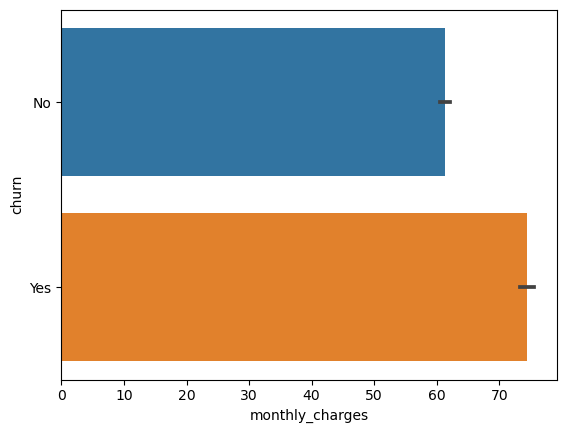

In [20]:
sns.barplot(x = "monthly_charges", y = "churn", data = df_telco)
# this one would be useful once the dataset is split 